# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set up the base url and parameters
base_url = "http://api.openweathermap.org/data/2.5/weather"
params = {
    "appid": weather_api_key,
    "units": "imperial"
}

# Set counters to initial values
city_counter = 1
set_counter = 1
set_size = 50
found_city_id = 0

# Create Column Headers and an empty Row list to hold the weather data
weather_columns=["City_ID" ,"City", "Cloudiness", "Country" ,"Date", "Humidity", "Lat" ,"Lng", "Max Temp","Wind Speed"]
weather_rows = []

# Print the starting message to console
print("Beginning Data Retrieval")
print("------------------------------")

# Set Start Time to use for checking # of API calls per minute
start_time = time.time()

# Loop through each city
for city in cities:
    # Set the last parameter to the city
    params['q'] = city
    
    # Print the processing city message to console
    print(f"Processing Record {city_counter} of Set {set_counter} | {city}")
    
    # Make API call
    response = requests.get(base_url, params=params).json()
    
    try:
        # Use the response data to create a row of data and append to the weather rows list, increment found city counter
        weather_row = [found_city_id, city, response["clouds"]["all"], response["sys"]["country"], response["dt"], response["main"]["humidity"], response["coord"]["lat"], response["coord"]["lon"], response["main"]["temp_max"], response["wind"]["speed"]]
        weather_rows.append(weather_row)
        found_city_id += 1
    except KeyError:
        # Error condition if data is not found, Print message to console
        print("City not found. Skipping...")

    # Increment the city counter, if city counter is greater then the group size reset city counter to 1 and increment the set counter
    city_counter += 1
    if city_counter > set_size:
        city_counter = 1
        set_counter += 1
        # Wait until 1 minute has passed from the previous start time
        time.sleep(60 - (time.time() - start_time))
        # Set new start time
        start_time = time.time()

# Create the weather_df DataFrame using the Column Header and Rows List
weather_df = pd.DataFrame(weather_rows, columns=weather_columns)


Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | upernavik
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | norman wells
Processing Record 6 of Set 1 | pisco
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | shemgang
Processing Record 9 of Set 1 | zharkent
Processing Record 10 of Set 1 | nanortalik
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | constitucion
Processing Record 14 of Set 1 | rocha
Processing Record 15 of Set 1 | yafran
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | anchorage
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | vrangel
Processing Record 22 of Set 1 | busselton
Processing Record 23 of Set 1 | mabaruma
Processing Record 24 of Set

Processing Record 40 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 41 of Set 4 | berdsk
Processing Record 42 of Set 4 | kaitangata
Processing Record 43 of Set 4 | bryan
Processing Record 44 of Set 4 | tateyama
Processing Record 45 of Set 4 | okato
Processing Record 46 of Set 4 | pochutla
Processing Record 47 of Set 4 | bocas del toro
Processing Record 48 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 49 of Set 4 | yulara
Processing Record 50 of Set 4 | saint george
Processing Record 1 of Set 5 | raudeberg
Processing Record 2 of Set 5 | kabo
Processing Record 3 of Set 5 | kilindoni
Processing Record 4 of Set 5 | sidi ali
Processing Record 5 of Set 5 | mehriz
Processing Record 6 of Set 5 | mayo
Processing Record 7 of Set 5 | the valley
Processing Record 8 of Set 5 | vuktyl
Processing Record 9 of Set 5 | karratha
Processing Record 10 of Set 5 | bembereke
Processing Record 11 of Set 5 | codrington
Processing Record 12 of Set 5 | maraa
Processing 

Processing Record 31 of Set 8 | bend
Processing Record 32 of Set 8 | pomabamba
Processing Record 33 of Set 8 | chauk
Processing Record 34 of Set 8 | gueugnon
Processing Record 35 of Set 8 | turukhansk
Processing Record 36 of Set 8 | kendari
Processing Record 37 of Set 8 | cidreira
Processing Record 38 of Set 8 | aleksandrovka
Processing Record 39 of Set 8 | pucara
Processing Record 40 of Set 8 | vanimo
Processing Record 41 of Set 8 | mayenne
Processing Record 42 of Set 8 | port moresby
Processing Record 43 of Set 8 | dalbandin
Processing Record 44 of Set 8 | nishihara
Processing Record 45 of Set 8 | castelo do piaui
Processing Record 46 of Set 8 | manono
Processing Record 47 of Set 8 | san policarpo
Processing Record 48 of Set 8 | gumdag
Processing Record 49 of Set 8 | kisaran
Processing Record 50 of Set 8 | steinbach
Processing Record 1 of Set 9 | christchurch
Processing Record 2 of Set 9 | san cristobal
Processing Record 3 of Set 9 | lazaro cardenas
Processing Record 4 of Set 9 | tac

Processing Record 21 of Set 12 | henties bay
Processing Record 22 of Set 12 | den helder
Processing Record 23 of Set 12 | pangai
Processing Record 24 of Set 12 | agbor
Processing Record 25 of Set 12 | kahului
Processing Record 26 of Set 12 | bulgan
Processing Record 27 of Set 12 | gazli
Processing Record 28 of Set 12 | barsovo
Processing Record 29 of Set 12 | millerovo
Processing Record 30 of Set 12 | gurupa
Processing Record 31 of Set 12 | paraiso
Processing Record 32 of Set 12 | idrinskoye
Processing Record 33 of Set 12 | tabuk
Processing Record 34 of Set 12 | alexandria
Processing Record 35 of Set 12 | san ignacio
Processing Record 36 of Set 12 | kudahuvadhoo
Processing Record 37 of Set 12 | porto-vecchio
Processing Record 38 of Set 12 | port-cartier
Processing Record 39 of Set 12 | manzanillo
Processing Record 40 of Set 12 | waingapu
Processing Record 41 of Set 12 | new richmond
Processing Record 42 of Set 12 | basoko
Processing Record 43 of Set 12 | goderich
Processing Record 44 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Write the DataFrame to a csv file
weather_df.to_csv(output_data_file, index=False, header=True)

# Drop City_ID column as it is no longer needed
weather_df.drop(columns="City_ID",inplace=True)

# Display the DataFrame
weather_df

# Get the maximum date value from the weather data and convert to mm/dd/yy format
run_date = time.strftime("%D", time.localtime(int(weather_df["Date"].max())))


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

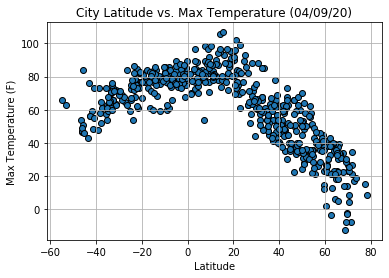

In [5]:
# Create scatter plot for Latitude vs Max Temp, include grid lines, labels, and title
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black")
plt.grid(b=True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({run_date})")

# Save the scatter plot to a file
plt.savefig("../output_data/LatvTemp.png")
# Display scatter plot
plt.show()

Each circle represents the maximum temperature for a city and the city's latitude.  This chart shows the relationship between the latitude and the maximum temperature.  The chart shows that as the latitude is further away from 0 degrees the temperature decreases.

#### Latitude vs. Humidity Plot

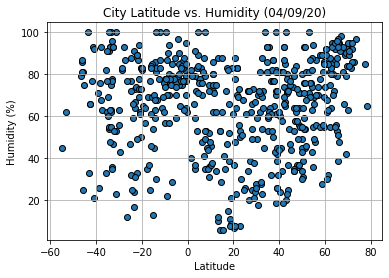

In [6]:
# Create scatter plot for Latitude vs Humidity, include grid lines, labels, and title
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black")
plt.grid(b=True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({run_date})")

# Save the scatter plot to a file
plt.savefig("../output_data/LatvHumidity.png")
# Display scatter plot
plt.show()

Each circle represents the humidity for a city and the city's latitude.  This chart shows the relationship between the latitude and the humidity.  The chart shows that the humidity is over 60% in most cities but the latitude is not a factor in the humidity levels.

#### Latitude vs. Cloudiness Plot

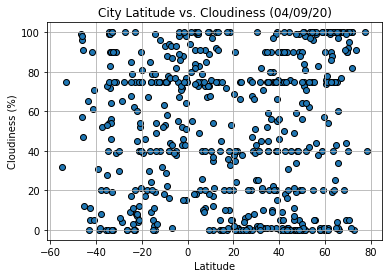

In [7]:
# Create scatter plot for Latitude vs Cloudiness, include grid lines, labels, and title
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black")
plt.grid(b=True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({run_date})")

# Save the scatter plot to a file
plt.savefig("../output_data/LatvCloudiness.png")
# Display scatter plot
plt.show()

Each circle represents the cloudiness percentage for a city and the city's latitude.  This chart shows the relationship between the latitude and the cloudiness percentage.  The chart shows that the cloudiness percentage has many datapoints at some specific percentages (0, 20, 40, 75, 90 and 100) and a smaller scattering of other values.  The cloudiness percentage is evenly distributed among each latitude value indicating there is little relationship between latitude and cloudiness.

#### Latitude vs. Wind Speed Plot

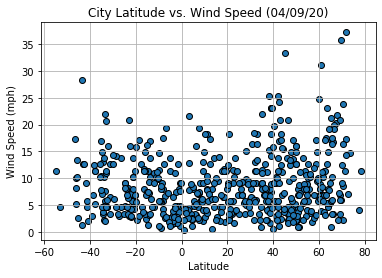

In [8]:
# Create scatter plot for Latitude vs Wind Speed, include grid lines, labels, and title
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black")
plt.grid(b=True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({run_date})")

# Save the scatter plot to a file
plt.savefig("../output_data/LatvWind.png")
# Display scatter plot
plt.show()

Each circle represents the wind speed for a city and the city's latitude.  This chart shows the relationship between the latitude and the wind speed.  The chart shows that the wind speed is mostly under 10 mph.  The wind speed is evenly distributed among each latitude value indicating there is little relationship between latitude and wind speed.

## Linear Regression

In [9]:
# Create a function to create Linear Regression plots
# Parameters: 
#    x_values - Data for X-Axis
#    y_values - Data for Y-Axis
#    x_label - Label for X-Axis
#    y_label - Label for X-Axis
#    Title - Title for Chart

def get_regression_data(x_values, y_values,x_label,y_label,title):
    
    # Call linregress function, use results to set the equation
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Identify the best place to write the equation on the chart
    if (slope < -0.5) | ((slope < 0) & (y_values.mean() < y_values.median())):
        # Put the equation in lower left corner
        annotate_xy = (x_values.min(),y_values.min()+3)
    elif (slope > 0.5) | ((slope > 0) & (y_values.median() < y_values.mean())):
        # Put the equation in upper left corner
        annotate_xy = (x_values.min(),y_values.max()-3)
    elif (slope < 0) & (y_values.median() < y_values.mean()):
        # Put the equation in upper right corner
        annotate_xy = (x_values.max() - .4*(x_values.max() - x_values.min()),y_values.max()-3)
    else:
        # Put the equation in lower right corner
        annotate_xy = (x_values.max() - .4*(x_values.max() - x_values.min()),y_values.min()+3)

    # Print r-squared value to console
    print(f"r-squared: {rvalue**2}")
    
    # Create scatter plot
    plt.scatter(x_values,y_values,edgecolors="black")
    
    # Create regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,annotate_xy,fontsize=15,color="red")
    
    # Add labels and title to scatter plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{title} ({run_date})")
    # Display the scatter plot
    plt.show()


In [10]:
# Create Northern and Southern Hemisphere DataFrames using 0 degrees Latitude
northern_hemisphere_df = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere_df = weather_df.loc[weather_df["Lat"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: 0.768413261534265


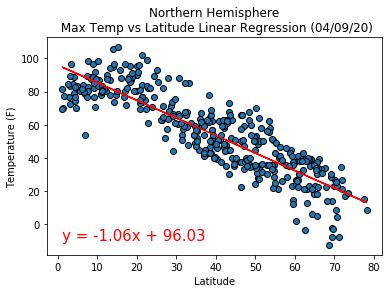

In [11]:
# Call get_regression_data to display Northern Hemisphere Max Temp vs Latitiude chart
get_regression_data(northern_hemisphere_df["Lat"],northern_hemisphere_df["Max Temp"],"Latitude","Temperature (F)","Northern Hemisphere\n Max Temp vs Latitude Linear Regression")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: 0.476983586408062


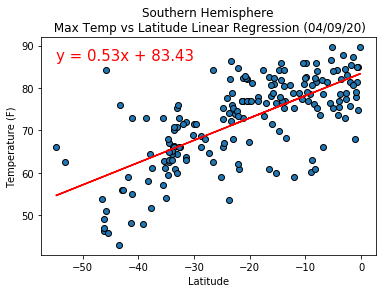

In [12]:
# Call get_regression_data to display Southern Hemisphere Max Temp vs Latitiude chart
get_regression_data(southern_hemisphere_df["Lat"],southern_hemisphere_df["Max Temp"],"Latitude","Temperature (F)","Southern Hemisphere\n Max Temp vs Latitude Linear Regression")

These charts show the relationship between Maximum Temperature and Latitude for both the Northern and Southern Hemispheres.  Both charts show that the temperature decreases as the latitude is further away from 0 but the Northern Hemisphere shows this more clearly.  The r-squared values for both charts indicate a strong relationship between Maximum Temperature and Latitude.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.08480161024602041


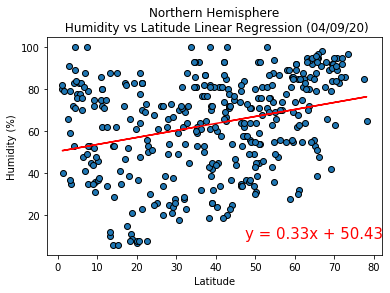

In [13]:
# Call get_regression_data to display Northern Hemisphere Humidity vs Latitiude chart
get_regression_data(northern_hemisphere_df["Lat"],northern_hemisphere_df["Humidity"],"Latitude","Humidity (%)","Northern Hemisphere\n Humidity vs Latitude Linear Regression")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.020631277549163676


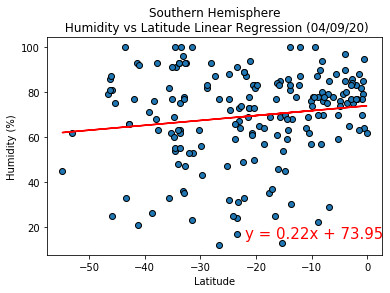

In [14]:
# Call get_regression_data to display Southern Hemisphere Humidity vs Latitiude chart
get_regression_data(southern_hemisphere_df["Lat"],southern_hemisphere_df["Humidity"],"Latitude","Humidity (%)","Southern Hemisphere\n Humidity vs Latitude Linear Regression")

These charts show the relationship between Humidity and Latitude for both the Northern and Southern Hemispheres.  The results for this are contradictory.  In the Northern Hemisphere, the humidity is increasing as the latitude is further away from 0 degrees but in the Southern Hemisphere humidity is decreasing as the latitude is further away from 0 degrees.  The r-squared values for both charts do not indicate a strong relationship between Humidity and Latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.013935894303878362


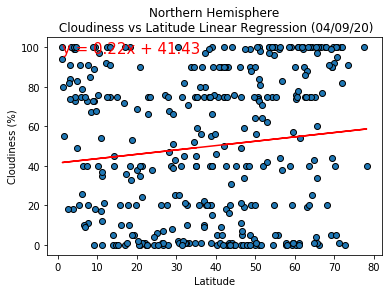

In [15]:
# Call get_regression_data to display Northern Hemisphere Cloudiness vs Latitiude chart
get_regression_data(northern_hemisphere_df["Lat"],northern_hemisphere_df["Cloudiness"],"Latitude","Cloudiness (%)","Northern Hemisphere\n Cloudiness vs Latitude Linear Regression")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.016179786886729997


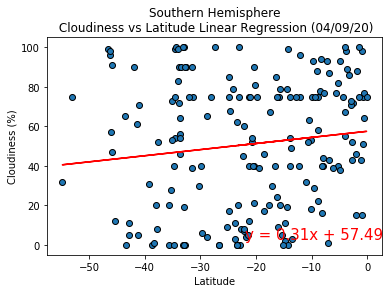

In [16]:
# Call get_regression_data to display Southern Hemisphere Cloudiness vs Latitiude chart
get_regression_data(southern_hemisphere_df["Lat"],southern_hemisphere_df["Cloudiness"],"Latitude","Cloudiness (%)","Southern Hemisphere\n Cloudiness vs Latitude Linear Regression")

These charts show the relationship between Cloudiness and Latitude for both the Northern and Southern Hemispheres.  For both charts the data is evenly distributed among the latitude values.  There are also many values at 0%, 20%, 40%, 75%, 90%, and 100%.  This indicates that this measurement is inexact and may based more on an estimate.  The r-squared values for both charts do not indicate a strong relationship between Cloudiness and Latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: 0.05061584312571686


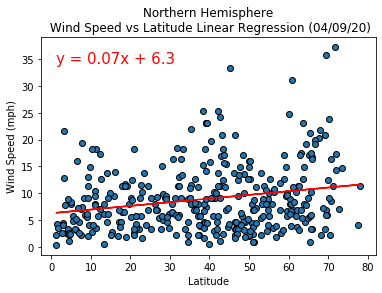

In [17]:
# Call get_regression_data to display Northern Hemisphere Wind Speed vs Latitiude chart
get_regression_data(northern_hemisphere_df["Lat"],northern_hemisphere_df["Wind Speed"],"Latitude","Wind Speed (mph)","Northern Hemisphere\n Wind Speed vs Latitude Linear Regression")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: 0.042591059472120246


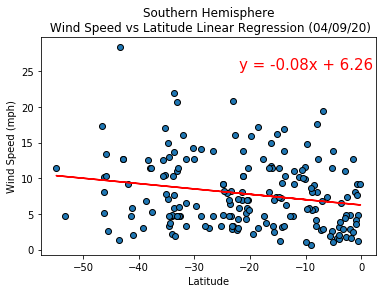

In [18]:
# Call get_regression_data to display Southern Hemisphere Wind Speed vs Latitiude chart
get_regression_data(southern_hemisphere_df["Lat"],southern_hemisphere_df["Wind Speed"],"Latitude","Wind Speed (mph)","Southern Hemisphere\n Wind Speed vs Latitude Linear Regression")

These charts show the relationship between Wind Speed and Latitude for both the Northern and Southern Hemispheres.  For both charts there is an increase in wind speed as the latitude is further away from 0 degrees.  The r-squared values for both charts indicate a slight relationship between Cloudiness and Latitude.